# Прогнозирование статуса студента EDA

Загрузка библиотек

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

import missingno as msno

%matplotlib inline

## Чтение данных

In [2]:
TRAIN_PATH = "PATH"
TEST_PATH = "PATH"
SUBMISSION_PATH = "PATH"

In [56]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

both = pd.concat([train[test.columns], test])

Выведем общую информацию о датасетах

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13584 non-null  int64  
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13577 non-null  object 
 4   Основания         13584 non-null  object 
 5   Изучаемый_Язык    12758 non-null  object 
 6   Дата_Рождения     13584 non-null  object 
 7   Уч_Заведение      12351 non-null  object 
 8   Где_Находится_УЗ  12203 non-null  object 
 9   Год_Окончания_УЗ  12284 non-null  float64
 10  Пособие           12576 non-null  float64
 11  Страна_ПП         13237 non-null  object 
 12  Регион_ПП         12966 non-null  object 
 13  Город_ПП          13141 non-null  object 
 14  Общежитие         13498 non-null  float64
 15  Наличие_Матери    13584 non-null  int64  
 16  Наличие_Отца      13584 non-null  float6

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6691 entries, 0 to 6690
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6691 non-null   int64  
 1   Код_группы        6691 non-null   int64  
 2   Год_Поступления   6691 non-null   int64  
 3   Пол               6688 non-null   object 
 4   Основания         6691 non-null   object 
 5   Изучаемый_Язык    6295 non-null   object 
 6   Дата_Рождения     6691 non-null   object 
 7   Уч_Заведение      6113 non-null   object 
 8   Где_Находится_УЗ  6031 non-null   object 
 9   Год_Окончания_УЗ  6074 non-null   float64
 10  Пособие           6207 non-null   float64
 11  Страна_ПП         6531 non-null   object 
 12  Регион_ПП         6401 non-null   object 
 13  Город_ПП          6477 non-null   object 
 14  Общежитие         6656 non-null   float64
 15  Наличие_Матери    6691 non-null   int64  
 16  Наличие_Отца      6691 non-null   float64


1. Признаки в датасете различные - как количественные, так и качественные.
2. Присутствуют пропуски в данных

In [34]:
train.sample(5)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус,Тип_заведения
6219,84293,20892,2017,Жен,ДН,Английский язык,1992,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,...,1,1.0,Россия,0.0,0.0,0.0,26.0,70.0,4,университет
10549,58870,17571,2012,Жен,СН,Английский язык,1995,"МОУ ""СОШ № 12""",Яровое г.,2012.0,...,1,1.0,Россия,0.0,0.0,0.0,25.0,53.0,4,сош
6760,65228,18402,2014,Муж,ОО,Английский язык,1996,"МБОУ ""Бродковская СОШ""","Алтайский край, Павловский р-н, Павловск с",2014.0,...,0,0.0,Россия,0.0,1.0,0.0,34.0,63.0,4,сош
5823,54867,12325,2013,Жен,БН,NaN,1995,NaN,NaN,NaN,...,1,1.0,NaN,0.0,NaN,NaN,36.0,69.0,3,Неизвестно
12636,82577,22040,2017,Муж,ОО,Английский язык,1999,МБОУ Петропавловская СОШ им. Героя Советского ...,"Алтайский край, Петропавловский р-н, Петропавл...",2017.0,...,1,1.0,Россия,0.0,0.0,0.0,34.0,66.0,-1,сош


In [35]:
test.sample(5)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Тип_заведения
586,66140,18231,2014,Жен,ОО,NaN,1996,NaN,NaN,NaN,...,0.0,1,1.0,Россия,0.0,0.0,0.0,36.0,76.0,Неизвестно
5378,86683,22176,2018,Жен,БН,Английский язык,1983,Всероссийский заочный финансово-экономический ...,г. Москва,2004.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,40.0,76.0,институт
1456,84239,20881,2017,Жен,ДН,Немецкий язык,1973,"ГОУВПО""Алтайский государственный технологическ...","Алтайский край, г. Барнаул",2009.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,26.0,68.0,университет
3195,51197,16912,2013,Жен,ОО,Английский язык,1995,"КГУ ""Школа-гимназия"" г. Риддер","г.Риддер, ВКО, Казахстан",2013.0,...,1.0,0,0.0,Казахстан,0.0,0.0,0.0,35.0,70.0,школа
300,63447,12523,2012,Жен,СН,NaN,1995,NaN,NaN,NaN,...,0.0,1,1.0,NaN,0.0,0.0,0.0,51.0,56.0,Неизвестно


Тренировочный набор данных содержит 13584 строк, тестовый файл содержит 6691 строку. Всего 23 признака и 1 целевая переменная.

## Целевая переменная

В данном соревновании предлагается решать задачу мультиклассификации со следующими значениями:
- `-1` - ушел в академический отпуск,
- `4` - закончил обучение
- `3` - отчислен
- `5` - призван в армию

In [8]:
train['Статус'].value_counts(normalize=True) * 100

 4    60.725854
 3    34.754122
-1     4.520024
Name: Статус, dtype: float64

В приведенном датасете отсутствует класс `5`. Также наблюдается сильный дисбаланс классов. В последующем мы будем это учитывать в модели.

## Количественные признаки

- `Год_Поступления`
- `Дата_Рождения`
- `Год_Окончания_УЗ`
- `СрБаллАттестата`

От даты рождения оставим только год рождения.

In [48]:
num_cols = [
    'Год_Поступления',
    'Дата_Рождения',
    'Год_Окончания_УЗ',
    'СрБаллАттестата'
    ]

In [57]:
train['Дата_Рождения'] = pd.to_datetime(train['Дата_Рождения']).apply(lambda birth_date: birth_date.year)
test['Дата_Рождения'] = pd.to_datetime(test['Дата_Рождения']).apply(lambda birth_date: birth_date.year)

Оценим пропуски в количественных признаках.

In [58]:
pd.concat([train[num_cols].isna().sum().rename('missing values in train'),
           test[num_cols].isna().sum().rename('missing values in test')],
          axis=1)

,missing values in train,missing values in test
Год_Поступления,0,0
Дата_Рождения,0,0
Год_Окончания_УЗ,1300,617
СрБаллАттестата,0,0


In [51]:
print(f"{both[num_cols].isna().any(axis=1).sum() / len(both):.0%}")

9%


Пропусков не так много. И все они содержатся в столбце `Год_Окончания_УЗ`. Чем  заполнять эти пропуски?

В данных содержатся данные с аномалиями (где Год поступленя много больше 2020 и Ср бал аттестата больше 500). На время исследования уберем эти данные из датасета.

In [59]:
train = train[~((train['СрБаллАттестата'] > 100) | (train['Год_Поступления'] > 2020))]
test = test[~((test['СрБаллАттестата'] > 100) | (test['Год_Поступления'] > 2020))]

both = pd.concat([train[test.columns], test])

Рассмотрим распределение этих признаков. Так же рассмотрим вероятность быть отчисленным и взять академический отпуск.

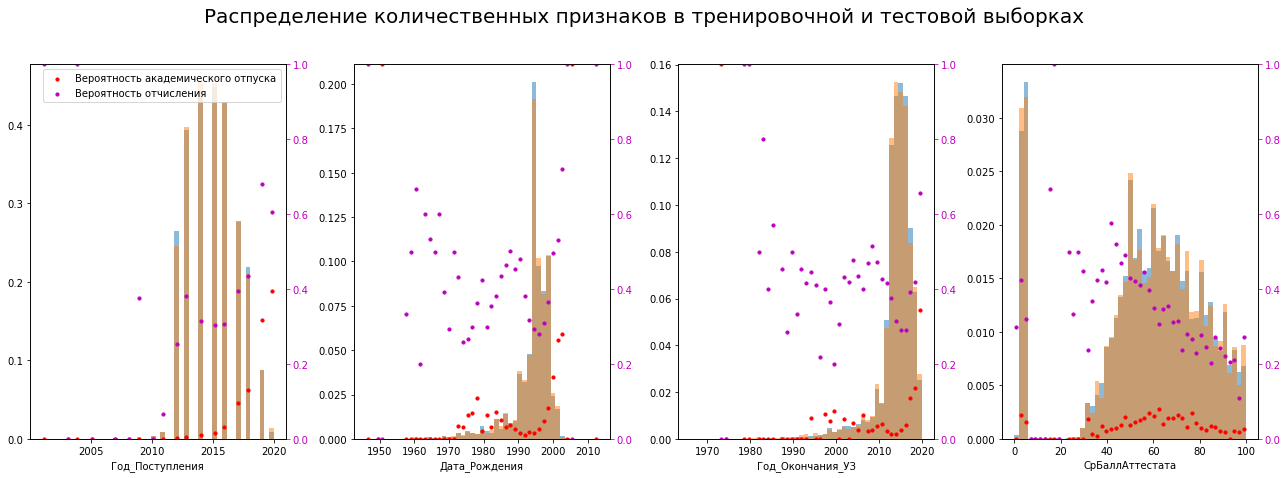

In [64]:
_, axs = plt.subplots(1, 4, figsize=(18,6))

for f, ax in zip(num_cols, axs.ravel()):

    mi = min(train[f].min(), test[f].min())
    ma = max(train[f].max(), test[f].max())
    bins = np.linspace(mi, ma, 50)

    ax.hist(train[f], bins=bins, alpha=0.5, density=True, label='train')
    ax.hist(test[f], bins=bins, alpha=0.5, density=True, label='test')
    ax.set_xlabel(f)

    ax2 = ax.twinx()
    total, _ = np.histogram(train[f], bins=bins)
    expelled, _ = np.histogram(train[f][train['Статус'] == 3], bins=bins)
    academic, _ = np.histogram(train[f][train['Статус'] == -1], bins=bins)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)

        ax2.scatter((bins[1:] + bins[:-1]) / 2, academic / total,
                    color='r', s=10, label='Вероятность академического отпуска')
        ax2.scatter((bins[1:] + bins[:-1]) / 2, expelled / total,
                    color='m', s=10, label='Вероятность отчисления')
    ax2.set_ylim(0, 1)
    ax2.tick_params(axis='y', colors='m')
    if ax == axs[0]: 
        ax2.legend(loc='upper right')

plt.tight_layout(w_pad=1)
plt.suptitle('Распределение количественных признаков в тренировочной и тестовой выборках', fontsize=20, y=1.1)
plt.show()

Исходя из графиков мы можем выделить следующие особенности:
1. Вероятность быть отчисленным, по всей видимости, не зависит от года поступления, даты рождения и года окончания учебного заведения.
2. До 2015 года не практиковались академические отпуска,
3. Таким образом, мы замечаем растущую тенценцию на уход в академ отпуска у людей 90+ г. рождения,
4. Вероятность быть отчисленным снижается с ростом среднего балла аттестата,
5. Людей с низким средним балом предпочитают не отпускать в академ отпуск, а отчислять, судя по самой высокой вероятности.

## Качественные признаки

### Признаки, которые кодируются цифрами

- `Код_группы`
- `Пособие`
- `Общежитие`
- `Наличие_Матери`
- `Наличие_Отца`
- `Опекунство`
- `Село`
- `Иностранец`
- `КодФакультета`

In [16]:
int_cols = [
    'Код_группы',
    'Пособие',
    'Общежитие',
    'Наличие_Матери',
    'Наличие_Отца',
    'Опекунство',
    'Село',
    'Иностранец',
    'КодФакультета'
]

In [61]:
pd.concat([train[int_cols].isna().sum().rename('missing values in train'),
           test[int_cols].isna().sum().rename('missing values in test')],
          axis=1)

,missing values in train,missing values in test
Код_группы,0,0
Пособие,1008,483
Общежитие,86,35
Наличие_Матери,0,0
Наличие_Отца,0,0
Опекунство,0,0
Село,86,36
Иностранец,310,129
КодФакультета,0,0


В столбцах так же присутствуют пропуски, но их незначительное количество.

Посмотрим на распределение признаков.

In [69]:
temp_df_expelled = train[(train['Статус']==3) | (train['Статус']==4)]
temp_df_expelled['Статус'] = temp_df_expelled['Статус'].map({3 : 1,
                                                             4 : 0})

temp_df_academic_leave = train[(train['Статус']==-1) | (train['Статус']==4)]
temp_df_academic_leave['Статус'] = temp_df_academic_leave['Статус'].map({-1 : 1,
                                                                          4 : 0})

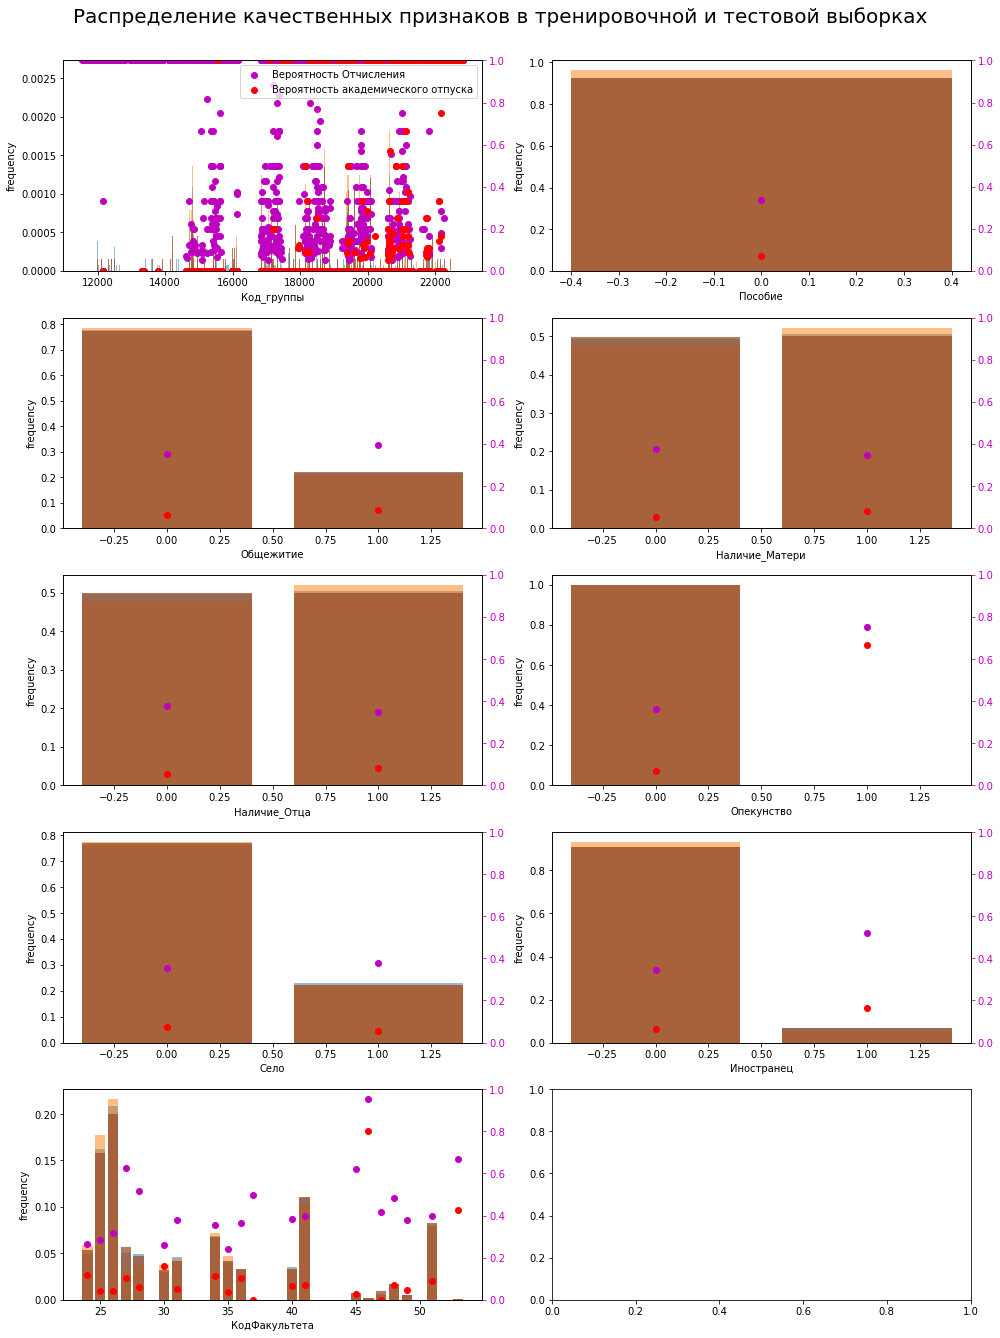

In [76]:
_, axs = plt.subplots(5, 2, figsize=(14, 18))

for f, ax in zip(int_cols, axs.ravel()):
    temp1 = temp_df_expelled['Статус'].groupby(temp_df_expelled[f]).agg(['mean', 'size'])
    temp2 = temp_df_academic_leave['Статус'].groupby(temp_df_academic_leave[f]).agg(['mean', 'size'])
    
    ax.bar(temp1.index, temp1['size'] / len(temp_df_expelled), alpha=0.5, label='train')
    ax.bar(temp2.index, temp2['size'] / len(temp_df_academic_leave), alpha=0.5, label='train')
    
    temp3 = test[f].value_counts()
    temp4 = test[f].value_counts()
    
    ax.bar(temp3.index, temp3 / len(test), alpha=0.5, label='test')
    ax.bar(temp4.index, temp4 / len(test), alpha=0.5, label='test')
    
    ax.set_xlabel(f)
    ax.set_ylabel('frequency')

    ax2 = ax.twinx()
    ax2.scatter(temp1.index, temp1['mean'],
                color='m', label='Вероятность Отчисления')
    ax2.scatter(temp2.index, temp2['mean'],
                color='r', label='Вероятность академического отпуска')
    
    ax2.set_ylim(0, 1)
    ax2.tick_params(axis='y', colors='m')
    if ax == axs[0, 0]: 
        ax2.legend(loc='upper right')
        
plt.tight_layout(w_pad=1)
plt.suptitle('Распределение качественных признаков в тренировочной и тестовой выборках', fontsize=20, y=1.03)
plt.show()

1. Самыми значимыми признаками будут код факультета и код группы, т.к. в них происходит видимое изменение таргета в зависимости от значения переменной,
2. Признак `Пособие` представлен лишь одним значением, его необходимо удалить из датасета,
3. Признак `Опекунство` хорошо различим, только наблюдается сильный дисбаланс этого признака, что так же может сделать его непригодным для модели.

## Признаки, которые кодируются строками

In [110]:
str_col = [
    'Пол',
    'Основания',
    'Изучаемый_Язык',
    'Уч_Заведение',
    'Где_Находится_УЗ',
    'Страна_ПП',
    'Регион_ПП',
    'Город_ПП',
    'Страна_Родители'
]

In [111]:
pd.concat([train[str_col].isna().sum().rename('missing values in train'),
           test[str_col].isna().sum().rename('missing values in test')],
          axis=1)

,missing values in train,missing values in test
Пол,7,3
Основания,0,0
Изучаемый_Язык,819,393
Уч_Заведение,1226,576
Где_Находится_УЗ,1359,653
Страна_ПП,332,158
Регион_ПП,603,287
Город_ПП,436,214
Страна_Родители,450,196


В этих столбцах больше всего пропусков. Чем заполнять пропуски в данных столбцах?

Посмотрим на количество уникальных значений в этих столбцах.

In [112]:
train[str_col].nunique()

Пол                    3
Основания              5
Изучаемый_Язык         7
Уч_Заведение        3629
Где_Находится_УЗ    2102
Страна_ПП             23
Регион_ПП            192
Город_ПП            1761
Страна_Родители       19
dtype: int64

In [113]:
test[str_col].nunique()

Пол                    3
Основания              6
Изучаемый_Язык         7
Уч_Заведение        2235
Где_Находится_УЗ    1257
Страна_ПП             19
Регион_ПП            133
Город_ПП            1092
Страна_Родители       14
dtype: int64

Количество уникальных значений на тренировочной и тестовой выборках отличается. Может получится так, что одни значения есть в train, но нет в test и наоборот.

Посмотрим на количество строк, которые содержат какой-либо пропуск.

In [114]:
print(f"{both[str_col].isna().any(axis=1).sum() / len(both):.0%}")

14%


Ожидаемо получили самый высокий процент.

Так как у нас много уникальных значений, то:
1. Рассмотрим не все признаки,
2. Упростим признак `Уч_Заведение`

In [115]:
def _return_edu_institution(value):
    
    if isinstance(value, float):
        return 'Неизвестно'

    value = value.lower()

    if 'университет' in value:
        return 'университет'
    if 'школа' in value:
        return 'школа'
    if 'лицей' in value:
        return 'лицей'
    if 'колледж' in value:
        return 'колледж'
    if 'институт' in value:
        return 'институт'
    if 'академия' in value:
        return 'академия'
    if 'гимназия' in value:
        return 'гимназия'
    if 'техникум' in value:
        return 'техникум'
    if 'сош' in value:
        return 'сош'

    return 'другое'

In [116]:
train['Тип_заведения'] = train['Уч_Заведение'].apply(_return_edu_institution)
test['Тип_заведения'] = test['Уч_Заведение'].apply(_return_edu_institution)

train['Тип_заведения'] = train['Уч_Заведение'].apply(_return_edu_institution)
test['Тип_заведения'] = test['Уч_Заведение'].apply(_return_edu_institution)

In [117]:
str_col = [
    'Пол',
    'Основания',
    'Изучаемый_Язык',
    'Страна_ПП',
    'Страна_Родители',
    'Тип_заведения'
]

Только для этих колонок, т.к. значений в других слишком много и невозможно определить зависимость.

В дальнейшем рассмотрим наш датасет как 2:
1. Примем `Отчислен` - 1, `Закончил` - 0

**`Отчислен` - `Закончил`**

In [126]:
temp_df = train[(train['Статус']==4) | (train['Статус']==3)]
temp_df['Статус'] = temp_df['Статус'].map({3 : 1,
                                           4 : 0})

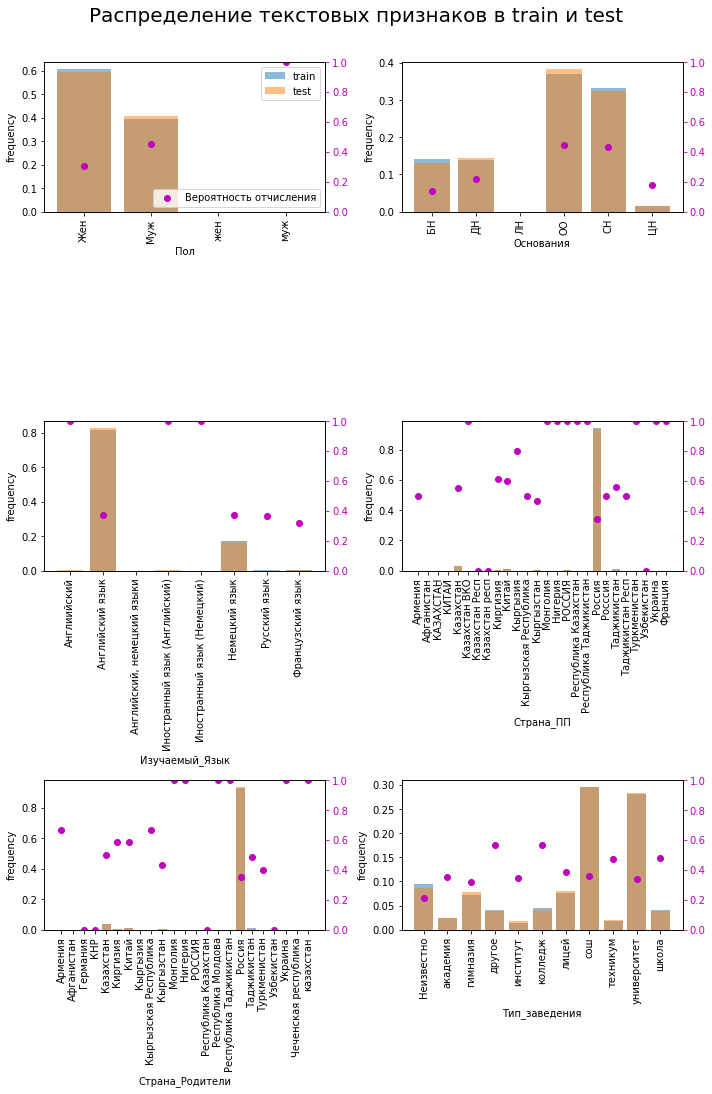

In [127]:
_, axs = plt.subplots(3, 2, figsize=(10, 15))
for f, ax in zip(str_col, axs.ravel()):
    temp1 = temp_df[f].value_counts(dropna=True, normalize=True)
    temp2 = test[f].value_counts(dropna=True, normalize=True)
    values = sorted(set(temp1.index).union(temp2.index))
    temp1 = temp1.reindex(values)
    temp2 = temp2.reindex(values)
    ax.bar(range(len(values)), temp1, alpha=0.5, label='train')
    ax.bar(range(len(values)), temp2, alpha=0.5, label='test')
    ax.set_xlabel(f)
    ax.set_ylabel('frequency')
    ax.set_xticks(range(len(values)), values,
                 rotation=90)
    
    temp1 = temp_df['Статус'].groupby(train[f]).agg(['mean', 'size'])
    temp1 = temp1.reindex(values)
    ax2 = ax.twinx()
    ax2.scatter(range(len(values)), temp1['mean'],
                color='m', label='Вероятность отчисления')
    ax2.tick_params(axis='y', colors='m')
    ax2.set_ylim(0, 1)
    if ax == axs[0,0]: ax2.legend(loc='lower right')

axs[0, 0].legend()
plt.suptitle('Распределение текстовых признаков в train и test', fontsize=20, y=1.01)
plt.tight_layout(w_pad=1)
plt.show()
del temp1, temp2

2. Примем `Академ.отпуск` - 1, `Закончил` - 0

**`Академ.отпуск` - `Закончил`**

In [131]:
temp_df = train[(train['Статус']==-1) | (train['Статус']==4)]
temp_df['Статус'] = temp_df['Статус'].map({-1 : 1,
                                           4 : 0})

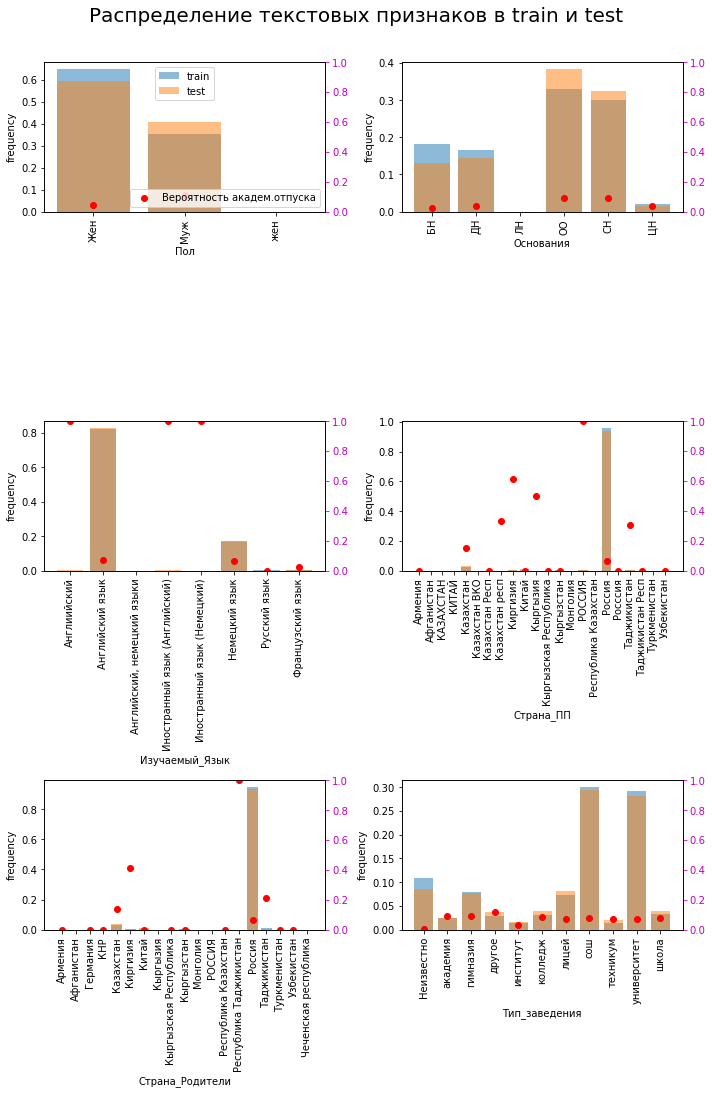

In [132]:
_, axs = plt.subplots(3, 2, figsize=(10, 15))
for f, ax in zip(str_col, axs.ravel()):
    temp1 = temp_df[f].value_counts(dropna=True, normalize=True)
    temp2 = test[f].value_counts(dropna=True, normalize=True)
    values = sorted(set(temp1.index).union(temp2.index))
    temp1 = temp1.reindex(values)
    temp2 = temp2.reindex(values)
    ax.bar(range(len(values)), temp1, alpha=0.5, label='train')
    ax.bar(range(len(values)), temp2, alpha=0.5, label='test')
    ax.set_xlabel(f)
    ax.set_ylabel('frequency')
    ax.set_xticks(range(len(values)), values,
                 rotation=90)
    
    temp1 = temp_df['Статус'].groupby(train[f]).agg(['mean', 'size'])
    temp1 = temp1.reindex(values)
    ax2 = ax.twinx()
    ax2.scatter(range(len(values)), temp1['mean'],
                color='r', label='Вероятность академ.отпуска')
    ax2.tick_params(axis='y', colors='m')
    ax2.set_ylim(0, 1)
    if ax == axs[0,0]: ax2.legend(loc='lower right')

axs[0, 0].legend()
plt.suptitle('Распределение текстовых признаков в train и test', fontsize=20, y=1.01)
plt.tight_layout(w_pad=1)
plt.show()
del temp1, temp2

Прослеживается зависимость отчисления в зависимости от того, какое было образование изначально. В данном случае мы отобразили признак `Уч_Заведение` на пространство меньшей размерности `Тип_заведение`. Но вместе с этим и потеряли часть какой-то информации.

В конце посмотрим на положение пропусков в датасете.

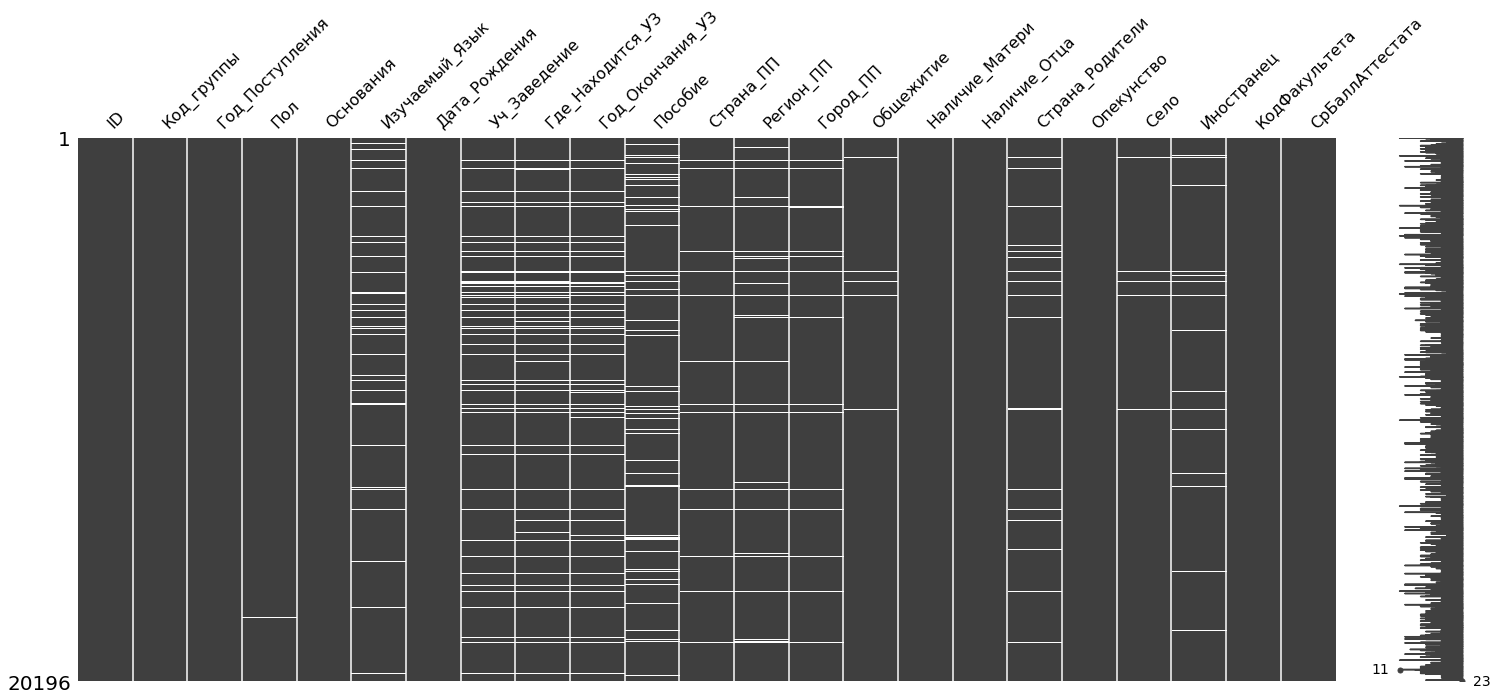

In [130]:
msno.matrix(both);

Здесь можно увидеть явнутю тенденцию, что пропуски не являются единичными, т.е. если у нас есть пропуск в строке, то как правило, пропуски будут сразу в нескольких столбцах.